# Alibi Jangeldin HW3 ML

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import loadtxt

In [2]:
train = loadtxt("logreg_data_binary.txt", comments="/n", delimiter=" ", unpack=False)
test = loadtxt("test_data_binary.txt", comments="/n", delimiter=" ", unpack=False)
X_train=train[:,1:4]
Y_train=train[:,0].reshape(len(train), 1)
X_test=test[:,1:4]
Y_test=test[:,0].reshape(len(test), 1)

In [3]:
mean=np.mean(X_train, axis=0)
std=np.std(X_train, axis=0)
X_train=(X_train-mean)/std
X_test=(X_test-mean)/std

In [4]:
X_train = np.hstack((np.ones((len(X_train), 1)), X_train))
X_test = np.hstack((np.ones((len(X_test), 1)), X_test))

In [5]:
def sigmoid(x):
    sigm=1.0/(1+np.exp(-x))
    return sigm

In [6]:
def nll_func(weights, x, y):
    m=len(y)
    sigm=sigmoid(x.dot(weights))
    J=-np.sum(y*np.log(sigm)+(1-y)*np.log(1-sigm))
    return J

In [7]:
#2 Stochastic gradient descent
def sgd(train_x, train_y, train_w, lr=0.05, iters=100):
    batch_size=20
    nll_hist=np.zeros(iters)
    loss_hist=np.zeros(iters)
    for j in range(iters):
        for i in np.arange(0, X_train.shape[0], batch_size):
            new_x=train_x[i:i+batch_size].reshape(batch_size, train_x.shape[1])
            new_y=train_y[i:i+batch_size].reshape(batch_size, 1)
            sigm=sigmoid(new_x.dot(train_w))
            error=sigm-new_y
            loss=np.sum(error**2)
            gradient=np.dot(new_x.T, error) / batch_size
            train_w = train_w-lr * gradient
        loss_hist[j]=loss
        nll_hist[j]=nll_func(train_w, train_x, train_y)
    return train_w, nll_hist, loss_hist

In [8]:
w = np.random.randn(X_train.shape[1], 1)
w_sgd, nll_history, loss_history = sgd(X_train, Y_train, w)

1) Decreasing of  NLL (negative log-likelihood) function with the increasing of iteration numbers


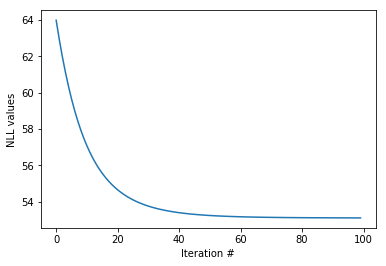

In [9]:
plt.plot(nll_history)
plt.xlabel("Iteration #")
plt.ylabel("NLL values")
print("1) Decreasing of  NLL (negative log-likelihood) function with the increasing of iteration numbers")
plt.show()

In [10]:
print("2) Obtained coefficient w  \n", w_sgd)

2) Obtained coefficient w  
 [[-0.81892125]
 [ 0.47059911]
 [ 0.25003173]
 [ 0.78521378]]


The slope is -1 and it is just a bias or average term independent of features. The fact that one of the parents obtained graduate degree has moderate positive effect on the outcome since it is higher than 0. The fact that institution is public has relatively small positive effect on the outcome. The gpa highness has significant positive effect on the outcome. This coincides with my expectations about the effect of this parameters on grad school admission process.

In [11]:
def accuracy(weights, X, Y):
    preds=sigmoid(X.dot(weights))
    acc=0
    for i in range(len(preds)):
        if(preds[i]>0.5):
            preds[i]=1
        else:
            preds[i]=0
    for i in range(len(preds)):
        if(preds[i]==Y[i]):
            acc+=1
    return acc/len(preds)

In [12]:
print("3) Number of correctly predicted students outcomes from test data is ", accuracy(w_sgd, X_test, Y_test)*len(X_test))
print("Percentage accuracy on test set is 49/70 =", accuracy(w_sgd, X_test, Y_test))
#print("Percentage accuracy on the training set is ", accuracy(w_sgd, X_train, Y_train))

3) Number of correctly predicted students outcomes from test data is  49.0
Percentage accuracy on test set is 49/70 = 0.7


49/70 test data points were correctly predicted and expectedly higher percentage of points in training data was correctly classified since we trained on it.

In [13]:
X_train_gpa=X_train[:,3].reshape(len(X_train), 1)
X_train_gpa = np.hstack((np.ones((len(X_train), 1)), X_train_gpa))
X_test_gpa = X_test[:,3].reshape(len(X_test), 1)
X_test_gpa = np.hstack((np.ones((len(X_test), 1)), X_test_gpa))

w_gpa = np.random.randn(X_train_gpa.shape[1], 1)
w_sgd_gpa, nll_history, loss_history = sgd(X_train_gpa, Y_train, w_gpa)

In [14]:
print("Number of correctly predicted students outcomes from test data is ", accuracy(w_sgd_gpa, X_test_gpa, Y_test)*len(X_test))
print("2) 1) Percentage accuracy on test set is ", accuracy(w_sgd_gpa, X_test_gpa, Y_test))
#print("Percentage accuracy on the training set is ", accuracy(w_sgd_gpa, X_train_gpa, Y_train))

Number of correctly predicted students outcomes from test data is  49.0
2) 1) Percentage accuracy on test set is  0.7


Unexpectedly, number of correctly predicted outcomes on the test set did not decrease with only GPA feature, this may be because other features are not predictive on the test set.

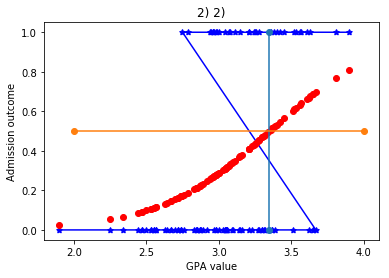

2) 3)  [ 3.34931276]


In [18]:
plt.plot(X_train_gpa[:,1]*std[2]+mean[2], Y_train, c='blue', marker=(5, 1))
plt.plot(X_train_gpa[:,1]*std[2]+mean[2], sigmoid(X_train_gpa.dot(w_sgd_gpa)), 'ro', c='red')
plt.plot([3.35, 3.35], [0, 1], marker = 'o')
plt.plot([2, 4], [0.5, 0.5], marker = 'o')
plt.xlabel("GPA value")
plt.ylabel("Admission outcome")
plt.title("2) 2)")
plt.show()
print("2) 3) ", -w_sgd_gpa[0]/w_sgd_gpa[1]*std[2]+mean[2])

2) 3) As we can see from the plot a cutting value for probability 0.5 is GPA>3.35 in the original scale. Classification boundary is linear since we are using only one feature. This coincides with my expectations for admission to grad school since I also had about this GPA and now I'm here doing this homework. To be more specific, we can calculate the value using the fact that inverse of sigmoid(0.5)=0 and get the value above.

In [192]:
def IRLS(y, X):
    n, _ = X.shape
    #W is an identitity matrix that would be used for WLS as diagonal matrix
    W = np.eye(n)
    #beta is our parameters to which we use initial guess of OLS for faster convergence
    w_irls = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    
    for iter in range(100):
        pi = sigmoid(X.dot(w_irls))
        #filling the diagonal of W with parameters reflecting weights in WLS updated in each step through beta
        for i in range(n):
            W[i,i] = np.multiply(pi,(1 - pi)).reshape(n)[i]
        #updating the parameters themselves with new pi and W updated from previous iteration
        w_irls_final = w_irls + np.linalg.inv((X.T.dot(W)).dot(X)).dot(X.T).dot(y - pi)
        #calculating the progress in estimation until the change will be negligible for our convergence purposes
        error = max(abs((w_irls_final - w_irls)/w_irls_final))
        if error < 1e-15:
            print("Converged in ",iter+1,"iterations")
            return w_irls_final
        w_irls=w_irls_final

In [193]:
w_irls = IRLS(Y_train, X_train)

Converged in  7 iterations


In [194]:
print(np.sum((w_irls-w_sgd)**2))

0.00125053650856


Qestion 2) bonus) IRLS algorithm is described in PRML book at page 207. For this problem we do not have analytical solution like OLS for linear regression because of sigmoid nonlinearity. Nevertheless, since our loss is convex we can use Newton-Raphson method for optimization. It is based on updating parameters using Hessian instead of the gradient, the main idea is in iteratively updating the weights based on weighted least squares solution. Using it we can converge to the solution much faster (only 7 iterations) than mini batch SGD above (50 iterations with 5 batches which can be approximated as 50/5>=10 iterations on the whole dataset). I think that the reason for this is because we are using Hessian which carries information that allows us faster convergence. Checking the difference between learned parameters with the one obtained from SGD shows that they are very close to each other.